## The contents include:

* 5. Performing Statistical Tests
* 6. Generating Probability Distributions
* 7. Working with PubMed in R
* 8. Retrieving data from BioMart
* 9. Visualizing data

## 5. Performing Statistical Tests

When we handle statistical data, we want to know the significance of results in research or application. And by using R built-in functions, we can easily perform statistical tests to assess the significance and make quantitative decisions. The idea is to determine whether there is enough evidence to reject a conjecture about the results. In-built functions in R allow several such tests on data. The choice of test depends on the data and the question being asked. When we need to compare a group against a hypothetical value and our measurements follow the Gaussian distribution, we can use a one-sample t-test. However, if we have two paired groups (both measurements that follow the Gaussian distribution) being compared, it is better to use a paired t-test. R has built-in functions to carry out such tests, and in this recipe, we will try out some of these.

In [2]:
data(sleep)

##  a group against a hypothetical value
t.test(sleep[, 1]~sleep[, 2]) 


	Welch Two Sample t-test

data:  sleep[, 1] by sleep[, 2]
t = -1.8608, df = 17.776, p-value = 0.07939
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.3654832  0.2054832
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 


In [4]:
#### prepare a matrix
cont <- matrix(c(14, 33, 7, 3), ncol = 2)
cont
colnames(cont) <- c("Sedan", "Convertible")
rownames(cont) <- c("Male", "Female")
cont

14,7
33,3


,Sedan,Convertible
Male,14,7
Female,33,3


In [7]:
test <- chisq.test(as.table(cont))
test

Warning message in chisq.test(as.table(cont)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test with Yates' continuity correction

data:  as.table(cont)
X-squared = 4.1324, df = 1, p-value = 0.04207


In [8]:
x <- c(1.83, 0.50, 1.62, 2.48, 1.68, 1.88, 1.55, 3.06, 1.30)
y <- c(0.878, 0.647, 0.598, 2.05, 1.06, 1.29, 1.06, 3.14, 1.29)
test <- wilcox.test(x, y, paried = T, alternative = "greater")
test

Warning message in wilcox.test.default(x, y, paried = T, alternative = "greater"):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  x and y
W = 58, p-value = 0.06646
alternative hypothesis: true location shift is greater than 0


In [9]:
## by str() function, you can see various parameters of the data.
str(test)

List of 7
 $ statistic  : Named num 58
  ..- attr(*, "names")= chr "W"
 $ parameter  : NULL
 $ p.value    : num 0.0665
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "location shift"
 $ alternative: chr "greater"
 $ method     : chr "Wilcoxon rank sum test with continuity correction"
 $ data.name  : chr "x and y"
 - attr(*, "class")= chr "htest"


In [10]:
test$p.value

[1] 0.06645973

## 6. Generating Probability Distributions

To have a better understanding of distributions, we can type `?distributions` and then we can get an access to the help web of 'distributions in the stats package'.

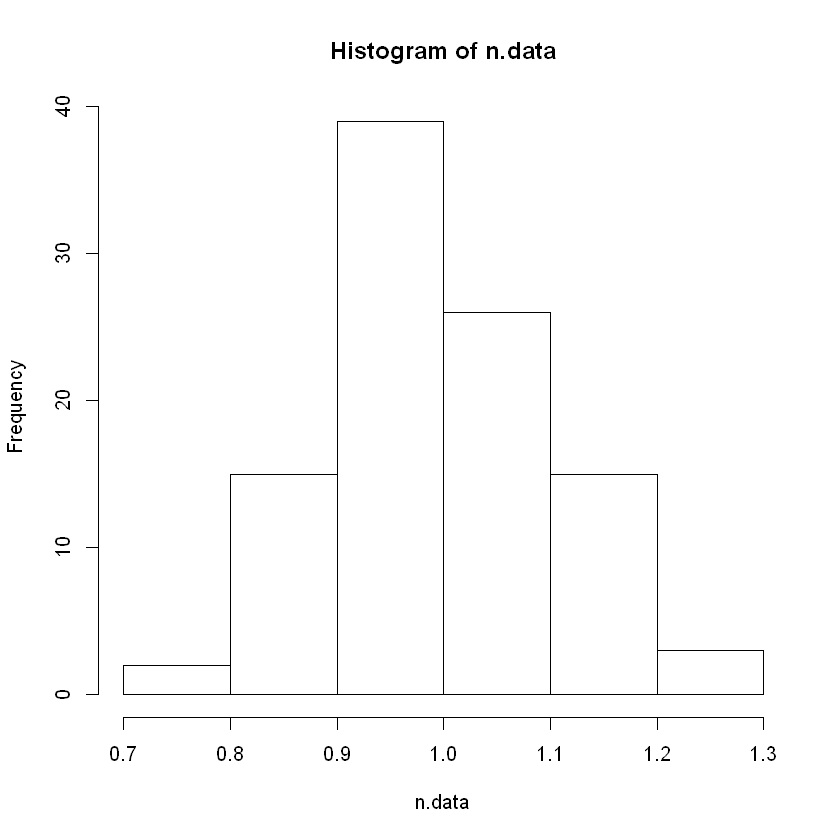

In [11]:
n.data <- rnorm(n = 100, mean = 1, sd = 0.1)
hist(n.data)
# 'rnorm()' generate 100 instances of normally distributed data with a mean equal to 1 and standard deviation equal to 0.1,
# and then 'hist()' plots the histogram to observe the distribution.

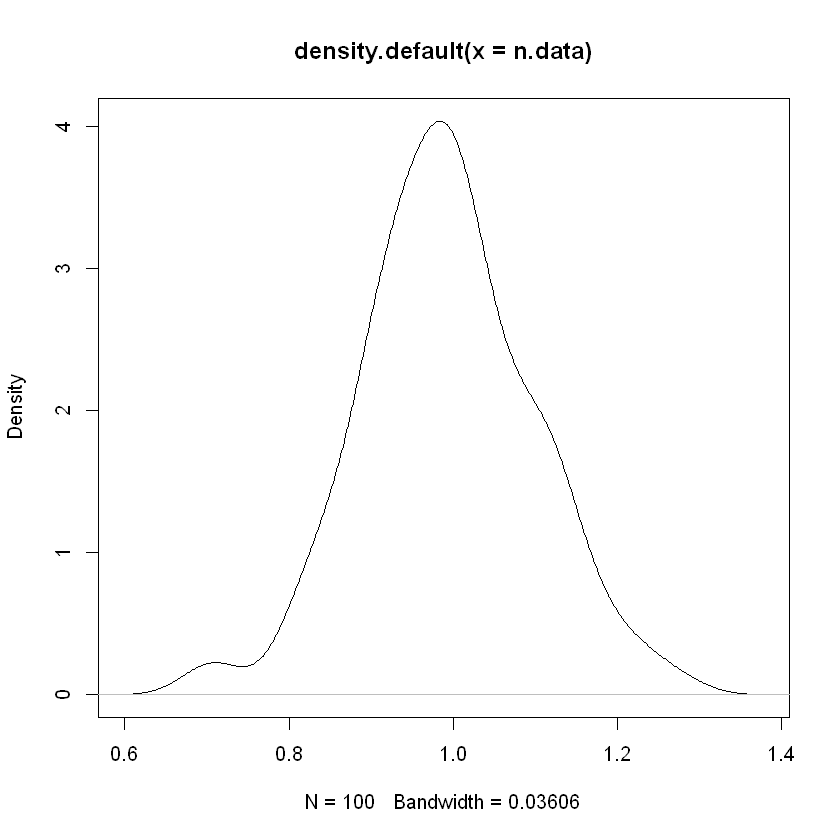

In [12]:
plot(density(n.data))

There are various statistical distributions in R, and they are in R base packages. We can use them by commands.<br>
To learn more about statistical distribution, visit [Wolfram page](http://www.wolframalpha.com/examples/StatisticalDistributions.html).
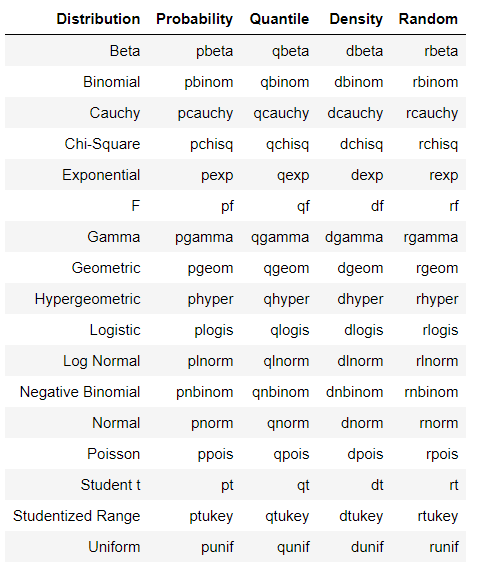

In [13]:
m.data <- rbeta(50, 4, 2)
m.data

[1] 0.6480577 0.5351443 0.5522433 0.7843900 0.7469116 0.4704011 0.3236568
 [8] 0.6846954 0.4434592 0.6546565 0.8894349 0.4709886 0.5283754 0.6136122
[15] 0.6981687 0.7680503 0.8382161 0.6998463 0.9104742 0.6037128 0.5101398
[22] 0.8373220 0.7179093 0.5793272 0.7375345 0.9014538 0.6752654 0.2480044
[29] 0.5255590 0.9148405 0.5676304 0.8163378 0.8371863 0.7613774 0.7223525
[36] 0.5990538 0.5046248 0.8893509 0.5542816 0.5573947 0.8985132 0.8685342
[43] 0.7783203 0.6935516 0.7048486 0.7281877 0.8840722 0.7924705 0.5567217
[50] 0.3989099

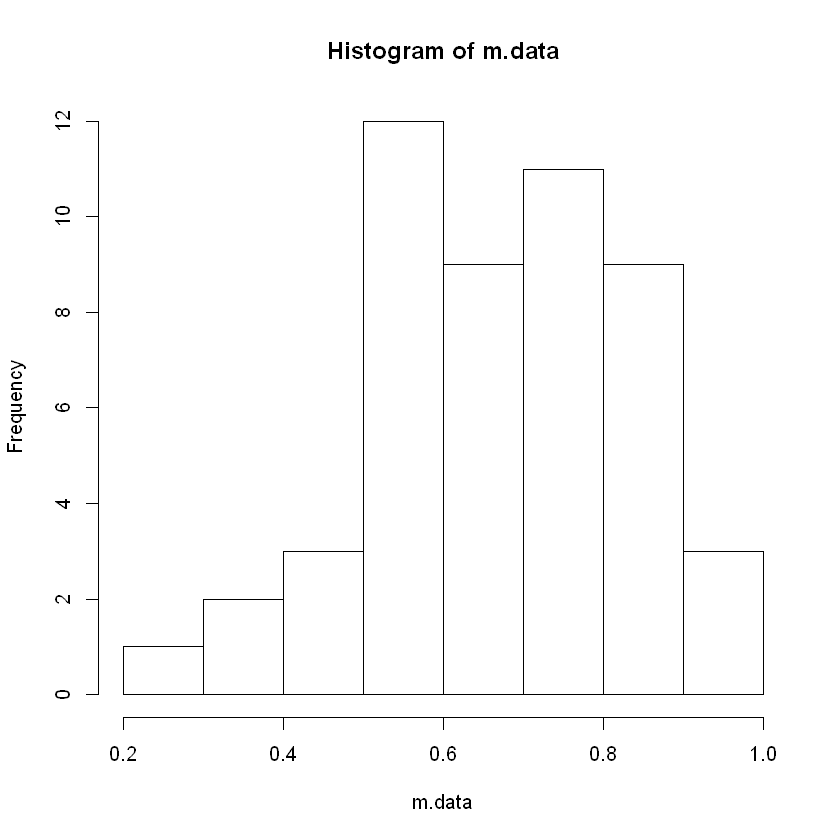

In [14]:
hist(m.data)

## 7. Working with PubMed in R

PubMed is a service that provides the option to look into the literature, papers or abstracts and so on. The service is available at<br> [PubMed](https://www.ncbi.nlm.nih.gov). R provides an interface to look into the various aspects of the literature via PubMed.<br> 
We can use the searching, storing, and mining, and quantification meta-analysis via the R without visiting the PubMed page every time.


In [15]:
BiocManager::install("RISmed")

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'RISmed'



package 'RISmed' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpWQgM9x\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'



In [16]:
library(RISmed)

In [17]:
#### 'myeloma' is the default data available with the 'RISmed' package .
data(myeloma)

In [21]:
str(myeloma)  #### To see the contents of the 'myeloma' object

Formal class 'Medline' [package "RISmed"] with 59 slots
  ..@ Query               : chr "\"multiple myeloma\"[MeSH Terms] AND 2012/05/08[EDAT] : 2013/05/08[EDAT]"
  ..@ PMID                : chr [1:10] "23648714" "23648667" "23648347" "23648290" ...
  ..@ YearReceived        : num [1:10] NA 2013 NA 2013 2013 ...
  ..@ MonthReceived       : num [1:10] NA 4 NA 4 2 NA NA 7 NA 3
  ..@ DayReceived         : num [1:10] NA 18 NA 16 3 NA NA 18 NA 4
  ..@ HourReceived        : num [1:10] NA NA NA NA NA NA NA NA NA NA
  ..@ MinuteReceived      : num [1:10] NA NA NA NA NA NA NA NA NA NA
  ..@ YearAccepted        : num [1:10] NA 2013 NA 2013 2013 ...
  ..@ MonthAccepted       : num [1:10] NA 5 NA 4 3 NA 5 3 NA 3
  ..@ DayAccepted         : num [1:10] NA 1 NA 18 18 NA 1 26 NA 4
  ..@ HourAccepted        : num [1:10] NA NA NA NA NA NA NA NA NA NA
  ..@ MinuteAccepted      : num [1:10] NA NA NA NA NA NA NA NA NA NA
  ..@ YearEpublish        : num [1:10] 2012 NA NA NA NA ...
  ..@ MonthEpublish       

In [22]:
## Use specific functions, you can find each element of the data.
AbstractText(myeloma)
Author(myeloma)
ArticleTitle(myeloma)
Title(myeloma)
PMID(myeloma)

[1] "OBJECTIVE: We retrospectively investigated the efficacy and predictive factors for the treatment outcomes of bortezomib plus dexamethasone (BD) as second-line induction therapy prior to high-dose chemotherapy supported by autologous stem cell transplantation (HDT/ASCT) in multiple myeloma (MM) patients.METHODS: Sixty-six transplant eligible MM patients treated by the Kyoto Clinical Hematology Study Group between 2006 and 2011 were investigated. Conventional induction chemotherapy, including vincristine, doxorubicin and dexamethasone (VAD) and high-dose dexamethasone (HDD), was used as first-line induction therapy in all patients, seven (10.6%) of whom attained a very good partial response (VGPR). Of the 59 patients who did not attain VGPR with VAD or HDD, 33 were given BD as second-line induction therapy prior to HDT/ASCT.RESULTS: Patients not treated with BD induction showed an overall response rate (ORR, i.e., better than partial response) of 85.3% after induction therapy, while the ORR of patients treated with BD induction improved from 42.4% after conventional induction therapy to 84.8% after BD. The overall survival (OS) and progression-free survival (PFS) of patients not treated with BD induction were not significantly influenced by the response to induction therapy. Among the patients treated with BD, failure in attaining VGPR prior to ASCT was associated with a significantly shorter PFS and it also tended to show a shorter OS, while the disease stage and achievement of a complete response after HDT/ASCT had no impact on OS or PFS.CONCLUSION: The achievement of at least VGPR with second-line BD induction therapy is a prerequisite for attaining longer OS and PFS after HDT/ASCT."                                              
 [2] "The combination of lenalidomide and dexamethasone (Len-Dex) is a commonly used initial therapy for newly diagnosed multiple myeloma (MM). Although the initial response rates and toxicity are well known, long-term outcome is not well described. We studied 286 consecutive patients with newly diagnosed MM initially treated with Len-Dex. The median (range) age at diagnosis was 63 (28-92) years, 166 (58%) patients = 65 years and 175 (61%) male. The median estimated duration on Len-Dex was 5.3 months with overall response (= partial response) of 72%, including 26% with very good partial response or better. The median overall survival (OS) from the diagnosis was not reached (NR) and the estimated 5-year survival was 71%. The median time to first disease progression, irrespective of transplant status, was 30.2 months. Overall, 143 (50%) patients underwent stem cell transplant. The median OS was NR for patients = 70 years and 5.8 years for the older patients (P=0.01). The 5-year OS estimate for patients in International Staging System stage 1, 2 and 3 were 82, 65, and 44% respectively. There were 21 new second malignancies after MM diagnosis (6.6%). The median survival exceeding 7 years reflects the efficacy of novel agents. The risk of second malignancies doesn't appear to be excessive in this population."                                                                                                                                                                                                                                                                                                                                                                                                                                                        
 [3] "OBJECTIVE: To evaluate the efficacy and prognostic factors of autologous hematopoietic stem cell transplantation (ASCT) in multiple myeloma (MM) patients.METHODS: Retrospective analysis was performed in 27 MM patients undergoing ASCT at our hospital from May 2004 to August 2011. After comparing with 28 patients achieving very good partial response (VGPR) or better outcome and not undergoing ASCT, the impact on the extent of response, progression-free survival

LastName,ForeName,Initials,order
<chr>,<chr>,<chr>,<int>
Kobayashi,Tsutomu,T,1
Kuroda,Junya,J,2
Fuchida,Shin-ichi,S,3
Murakami,Satoshi,S,4
Hatsuse,Mayumi,M,5
Okano,Akira,A,6
Iwai,Toshiki,T,7
Tsutsumi,Yasuhiko,Y,8
Kamitsuji,Yuri,Y,9


[1] "The response to second-line induction with bortezomib and dexamethasone is predictive of long-term outcomes prior to high-dose chemotherapy with autologous stem cell transplantation for multiple myeloma."
 [2] "Long-term outcome with lenalidomide and dexamethasone therapy for newly diagnosed multiple myeloma."                                                                                                        
 [3] "[Retrospective analysis on therapeutic effect of autologous hematopoietic stem cell transplantation in multiple myeloma patients]."                                                                         
 [4] "Mechanistic studies on the synergistic cytotoxicity of the nucleoside analogs gemcitabine and clofarabine in multiple myeloma: relevance of p53 and its clinical implications."                             
 [5] "TRIM13 (RFP2) downregulation decreases tumour cell growth in multiple myeloma through inhibition of NF Kappa B pathway and proteasome activity."                                                            
 [6] "False-positive PET scan after bone marrow biopsy."                                                                                                                                                          
 [7] "Differences in the distribution of cytogenetic subtypes between multiple myeloma patients with and without a family history of monoclonal gammopathy and multiple myeloma."                                 
 [8] "Inhibition of DEPDC1A, a bad prognostic marker in multiple myeloma, delays growth and induces mature plasma cell markers in malignant plasma cells."                                                        
 [9] "Natural history and prognostic impact of oligoclonal humoral response in patients with multiple myeloma after autologous stem cell transplantation: long-term results from a single institution."           
[10] "Cellular immunotherapy for plasma cell myeloma."

[1] "Internal medicine (Tokyo, Japan)" "Leukemia"                        
 [3] "Zhonghua yi xue za zhi"           "Experimental hematology"         
 [5] "British journal of haematology"   "British journal of haematology"  
 [7] "European journal of haematology"  "PloS one"                        
 [9] "Haematologica"                    "Bone marrow transplantation"

[1] "23648714" "23648667" "23648347" "23648290" "23647456" "23647318"
 [7] "23647020" "23646139" "23645688" "23645169"

In [28]:
## try to use this in R 3.3
# BiocManager::install("EUtilsSummary", version = 3.6)
# library(EUtilsSummary)
# cancer <- EUtilsSummary("cancer[ti]", type="research", db="pubmed")
# class(cancer)
# str(cancer)
# cancer@id[1:10]
# cancer.ris <- EUtilsGet(cancer, type="efetch", db="pubmed")
# class(cancer.ris)

## 8. Retrieving data from BioMart

The package,`biomaRt`, provides an interface to a collection of databases implementing the [BioMart suite](http://www.biomart.org).<br>
It enables the retrieval of data from a range of BioMart databases, such as Ensembl (genes and genomes), Uniprot (information on proteins), HGNC (gene nomenclature), Gramene (plant functional genomics), and Wormbase (information on C. elegans and other nematodes).

In [29]:
library('biomaRt')

In [30]:
## select an appropriate mart for retrieval by defining the right database for a query we want.
## And we will look for 'human ensembl genes'; using the `useMart()`:

mart <- useMart(biomart = "ensembl", dataset = "hsapiens_gene_ensembl")
mart

Object of class 'Mart':
  Using the ENSEMBL_MART_ENSEMBL BioMart database
  Using the hsapiens_gene_ensembl dataset

In [36]:
my_results <- getBM(attributes = c("hgnc_symbol"), mart = mart)
head(my_results)  ## get the list of genes from the ensembl data

,hgnc_symbol
,<chr>
1,MT-TF
2,MT-RNR1
3,MT-TV
4,MT-RNR2
5,MT-TL1
6,MT-ND1


In [34]:
N <- 50
mysample <- sample(my_results$hgnc_symbol,N)
head(mysample)   # sample 50 genes from the retrieved genes

[1] "ST13P6"    "MRPS36P2"  "LINC02329" "FAM236D"   "ATL1"      "KLHL29"

In [38]:
## The `biomaRt` package can also be used to retrieve sequences from the databases for a gene, namely "BRCA1".
seq <- getSequence(id="BRCA1", 
                   type="hgnc_symbol", 
                   seqType="peptide", 
                   mart = mart)
show(seq)

In [39]:
seq2 <- getSequence(id="ENST00000520540", 
                    type='ensembl_transcript_id',
                    seqType='gene_flank',
                    upstream = 30,
                    mart = mart)
# retrieve a sequence that specifies the chromosome position, 'upstream' and 'downstream' from a site can be used as well
seq2
show(seq2)

gene_flank,ensembl_transcript_id
<chr>,<chr>
AATGAAAAGAGGTCTGCCCGAGCGTGCGAC,ENST00000520540


                      gene_flank ensembl_transcript_id
1 AATGAAAAGAGGTCTGCCCGAGCGTGCGAC       ENST00000520540


## 9. Visualizing data

To get a direct understanding of our various data, these plotting functions manipulated in R can help us make these boring and numerous<br>
data to be a vivid plot or graph. Take the `iris` data as an example.<br>
More details in R help files.


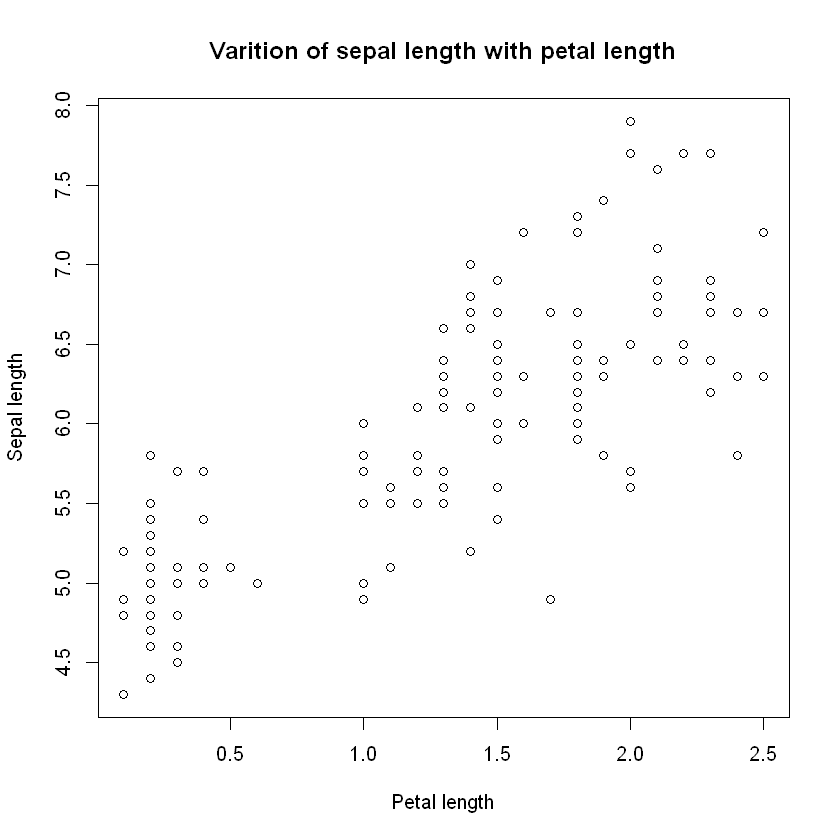

In [42]:
sl <- iris[,1]
pl <- iris[,4]

plot(x=pl, y=sl, 
     xlab="Petal length", 
     ylab="Sepal length",
     col="black", 
     main="Varition of sepal length with petal length")
# 'plot(with(iris, plot(x = Sepal.Length, y=Petal.Length))' can be another way to get the same results. 
# The argument for 'xlab' and 'ylab' respectively is used to change the axis labels.
# The main argument gives the plot a title..

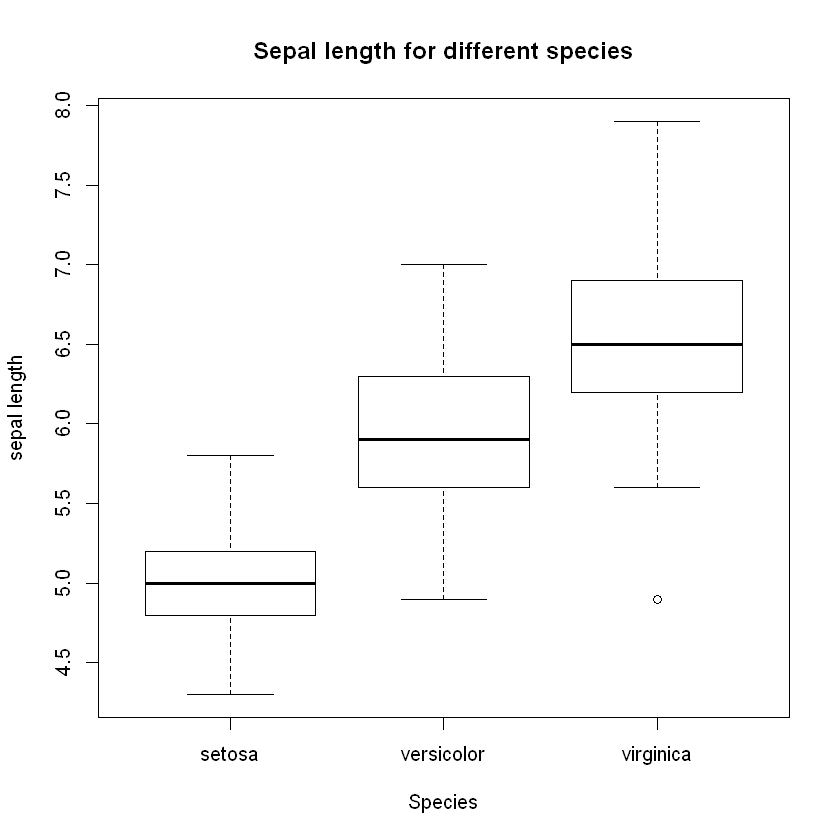

In [44]:
### create a boxplot for the data
boxplot(Sepal.Length~Species, 
        data=iris, 
        ylab="sepal length", 
        xlab="Species",
        main="Sepal length for different species")

In [ ]:
genex <- c(rnorm(100, 1, 0.1), rnorm(100, 2, 0.1), rnorm(50, 3, 0.1))
plot(x=genex, xlim=c(1,5), type='l', main="line diagram")
# 'type' argument is used to decide the type of the plot.